In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [113]:
data=pd.read_csv("Desktop/New folder/housing.csv.zip")

In [114]:
data.dropna(inplace=True)

In [115]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [116]:
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']


In [117]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)
def preprocess(X):
    X = X.copy()
    X['bedroom_ratio'] = X['total_bedrooms'] / X['total_rooms']
    X['household_rooms'] = X['total_rooms'] / X['households']
    
   
    X = X.drop(['ocean_proximity'], axis=1, errors='ignore')
    
    return X

In [118]:
X_train=preprocess(X_train)
X_test=preprocess(X_test)
train_data=X_train.join(Y_train)
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 5171 to 9385
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   bedroom_ratio       16346 non-null  float64
 9   household_rooms     16346 non-null  float64
 10  median_house_value  16346 non-null  float64
dtypes: float64(11)
memory usage: 2.0 MB


<Axes: xlabel='latitude', ylabel='longitude'>

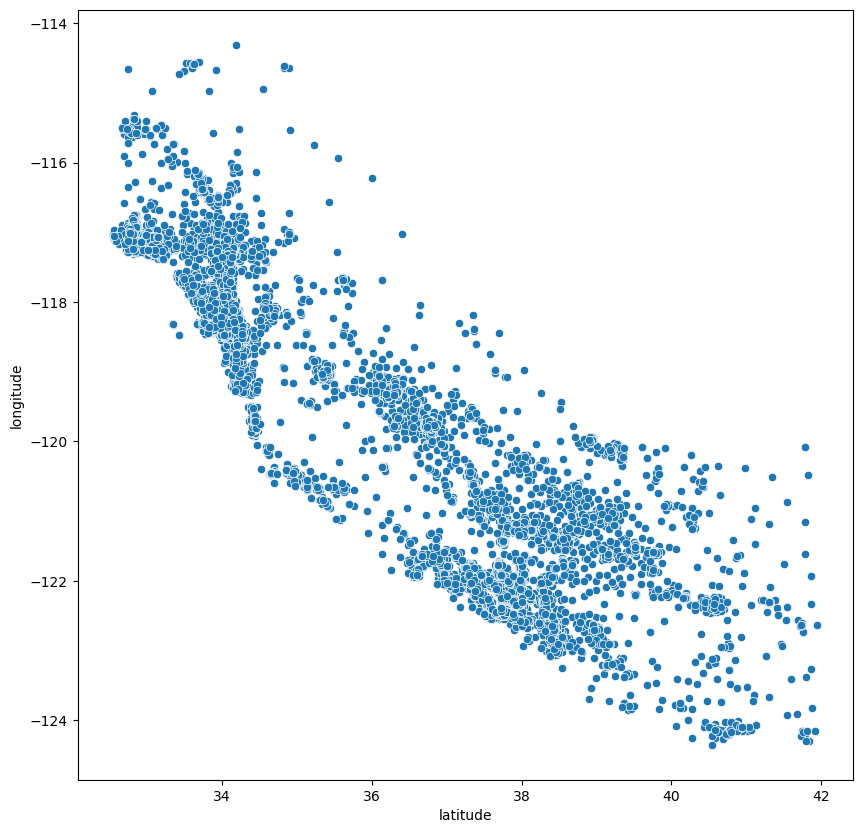

In [119]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="latitude",y="longitude",data=train_data,)

In [120]:
from sklearn.linear_model import LinearRegression


In [121]:

reg=LinearRegression()


In [122]:

reg.fit(X_train,Y_train)
"""X_test=scaler.transform(X_test)"""


'X_test=scaler.transform(X_test)'

In [123]:
reg.score(X_test,Y_test)

0.6468147397744799

In [124]:
from sklearn.linear_model import SGDRegressor

sgdr= SGDRegressor()

In [125]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [126]:
X_norm=scaler.fit_transform(X_train)

In [127]:
sgdr.fit(X_norm,Y_train)


SGDRegressor()

In [172]:
y_pred_sgd=sgdr.predict(X_norm)

feature_names=X_train.columns.tolist()
user_input=[]
for feature in feature_names:
    user_input.append(float(input(f"enter the value for { feature}")))
user_input=np.array(user_input).reshape(1,-1)


enter the value for longitude 121
enter the value for latitude 1222
enter the value for housing_median_age 12
enter the value for total_rooms 2
enter the value for total_bedrooms 1
enter the value for population 32
enter the value for households 32
enter the value for median_income 2
enter the value for bedroom_ratio 1
enter the value for household_rooms 1


In [130]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

user_input_scaled=scaler.transform(user_input)
prediction=sgdr.predict(user_input_scaled)

In [131]:
prediction

array([437615.27542067])